#  LAB 2 – Groups
- Group #5
  - Carlos David Ramírez Muñoz (25)
  - Juan David Madrid Contreras (17)
  - Caicedo Rosero Michael Sebastián (5)

In [ ]:
pip install -U fortran-magic

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 34 µs, sys: 4 µs, total: 38 µs
Wall time: 43.9 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(b[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(a[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul(a, b)

IndexError: list index out of range

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""

    # Compatibility condition len(A[0]) == len(B)
    if not(len(A[0]) == len(B)):
      raise Exception("Can't multiply matrices. Incompatible sizes")

    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

matmul(a, b)

Exception: Can't multiply matrices. Incompatible sizes

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a = [[2 , 6,3],
     [10,-2,3]]

b = [[5 , 1, 30, 0],
     [3, 1, 0, -20],
     [-3, 20, 8, 0]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(a, b)

[[19, 68, 84, -120], [35, 68, 324, 40]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

-1.1513426880533313

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.2506564514158802, 0.3092401579865518, 0.01232746220489922],
 [0.9806330704965485, 0.2580715665567681, 0.219497283940306]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
import time

python_execution_times = []

for i in range(10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)

  start_time = time.time()
  matmul(randa,randb)
  end_time = time.time()

  execution_time = end_time - start_time
  python_execution_times.append(execution_time)

python_mean_execution = np.mean(np.array(python_execution_times))
python_mean_execution

9.685693764686585

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
import pandas as pd

# Create a DataFrame
average_execution_times = pd.DataFrame({'name': 'python', 'execution_time':[python_mean_execution]})
average_execution_times

,name,execution_time
0,python,9.685694


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    #Using matrix of numpy
    A = np.array(A)
    B = np.array(B)

    if A.shape[0] != B.shape[1]:
      raise Exception("Can't multiply matrices. Incompatible sizes")

    out = np.dot(A,B) #Multiply matrix with dot method of numpy

    return out

In [ ]:
import time

numpy_execution_times = []

for i in range(10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)

  start_time = time.time()
  matmul(randa,randb)
  end_time = time.time()

  execution_time = end_time - start_time
  numpy_execution_times.append(execution_time)

numpy_mean_execution = np.mean(np.array(numpy_execution_times))

average_execution_times = average_execution_times.append({'name': 'numpy', 'execution_time':numpy_mean_execution}, ignore_index=True)

<ipython-input-44-aeaf1ec21213>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'numpy', 'execution_time':numpy_mean_execution}, ignore_index=True)


In [ ]:
average_execution_times

,name,execution_time
0,python,9.067456
1,numpy,0.015558


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 13.4 ms, sys: 0 ns, total: 13.4 ms
Wall time: 17.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 228 µs, sys: 0 ns, total: 228 µs
Wall time: 238 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A= [[2,2],[3,3]]

B= [[4,4],[5,5]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmult(A, B, result)
    double precision, intent(in) :: A(:,:)
    double precision, intent(in) :: B(:,:)
    double precision, intent(out) :: result(size(A,1), size(B,2))

    result = matmul(A,B)
end

*Code written using Github copilot assistance*

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%%time
matmult(A,B)

CPU times: user 37 µs, sys: 0 ns, total: 37 µs
Wall time: 41.2 µs


array([[18., 18.],
       [27., 27.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmult(A, B, result)
    double precision, intent(in) :: A(600,100)
    double precision, intent(in) :: B(100,600)
    double precision, intent(out) :: result(size(A,1), size(B,2))

    result = matmul(A,B)
end

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
randa = random_matrix(600,100)
randb = random_matrix(100,600)
matmult(randa, randb)

array([[24.98178129, 19.44353448, 22.14883103, ..., 21.01958873,
        23.06866677, 22.33714802],
       [26.35555792, 22.91876519, 24.80379802, ..., 22.9450526 ,
        26.6761335 , 22.60358001],
       [23.85209486, 21.26704425, 23.06333621, ..., 21.86268244,
        24.38339823, 23.03526548],
       ...,
       [25.40029657, 23.59698189, 23.24868407, ..., 24.83838944,
        27.08270543, 22.86382495],
       [26.92534323, 24.59937747, 24.56413074, ..., 23.47991619,
        27.03317392, 24.04068905],
       [23.65440074, 21.01321268, 23.71915191, ..., 21.46152632,
        22.81469336, 22.69192175]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
import time

fortran_magic_execution_times = []

for i in range(10):
  randa = random_matrix(600,100)
  randb = random_matrix(100,600)

  start_time = time.time()
  matmult(randa,randb)
  end_time = time.time()

  execution_time = end_time - start_time
  fortran_magic_execution_times.append(execution_time)

fortran_magic_mean_execution = np.mean(np.array(fortran_magic_execution_times))
average_execution_times = average_execution_times.append({'name': 'fortran_magic', 'execution_time':fortran_magic_mean_execution}, ignore_index=True)

<ipython-input-55-6ad6aa197df3>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'fortran_magic', 'execution_time':fortran_magic_mean_execution}, ignore_index=True)


In [ ]:
average_execution_times

,name,execution_time
0,python,9.685694
1,numpy,0.016628
2,fortran_magic,0.014705


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

Install Fortran compiler

In [ ]:
!apt-get install -y gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


In [ ]:
# @title Default title text { display-mode: "code" }
%%writefile matrixMulti.f90
PROGRAM MatrixMultiplication
  IMPLICIT NONE
  DOUBLE PRECISION, DIMENSION(600,100) :: A
  DOUBLE PRECISION, DIMENSION(100,600) :: B
  DOUBLE PRECISION, DIMENSION(600,600) :: result
  INTEGER :: i

  ! Perform matrix multiplication ten times
  DO i = 1, 10
    CALL random_number(A)
    CALL random_number(B)
    CALL matmult(A, B, result)
  END DO


CONTAINS

  SUBROUTINE matmult(A, B, result)
    DOUBLE PRECISION, INTENT(IN) :: A(600,100)
    DOUBLE PRECISION, INTENT(IN) :: B(100,600)
    DOUBLE PRECISION, INTENT(OUT) :: result(600,600)

    result = MATMUL(A,B)
  END SUBROUTINE matmult

END PROGRAM MatrixMultiplication

Writing matrixMulti.f90


*Code written using Github copilot assistance*

**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import time
start_time = time.time()

!gfortran matrixMulti.f90 -o MatrixMultiplication
!./MatrixMultiplication

end_time = time.time()
fortran_mean_execution_time = (end_time - start_time)/10

**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
average_execution_times = average_execution_times.append({'name': 'fortran', 'execution_time':fortran_mean_execution_time}, ignore_index=True)
average_execution_times

<ipython-input-60-1bd0003a52cd>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'fortran', 'execution_time':fortran_mean_execution_time}, ignore_index=True)


,name,execution_time
0,python,9.685694
1,numpy,0.016628
2,fortran_magic,0.014705
3,fortran,0.021018


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100)
and  B (100x600) matrices**

In [ ]:
%%writefile program.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROWS_A 600
#define COLS_A 100
#define ROWS_B 100
#define COLS_B 600

void fill_matrix(int rows, int cols, int matrix[rows][cols]) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 100;  // Llena la matriz con valores aleatorios entre 0 y 99
        }
    }
}

void multiply_matrices(int rowsA, int colsA, int matrixA[rowsA][colsA], int rowsB, int colsB, int matrixB[rowsB][colsB], int result[rowsA][colsB]) {
    for (int i = 0; i < rowsA; i++) {
        for (int j = 0; j < colsB; j++) {
            result[i][j] = 0;
            for (int k = 0; k < colsA; k++) {
                result[i][j] += matrixA[i][k] * matrixB[k][j];
            }
        }
    }
}

int main() {
    for (int i = 0; i < 10; i++) {
        srand(time(0));  // Inicializa la semilla del generador de números aleatorios

        int matrixA[ROWS_A][COLS_A];
        int matrixB[ROWS_B][COLS_B];
        int result[ROWS_A][COLS_B];

        fill_matrix(ROWS_A, COLS_A, matrixA);
        fill_matrix(ROWS_B, COLS_B, matrixB);

        multiply_matrices(ROWS_A, COLS_A, matrixA, ROWS_B, COLS_B, matrixB, result);
    }

    return 0;
}

Overwriting program.c


*Code written using Github copilot assistance*

**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import time
start_time = time.time()

!gcc program.c -o program
!./program

end_time = time.time()
c_mean_execution_time = (end_time - start_time)/10

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
average_execution_times = average_execution_times.append({'name': 'c', 'execution_time':c_mean_execution_time}, ignore_index=True)
average_execution_times

<ipython-input-64-2369303c5504>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'c', 'execution_time':c_mean_execution_time}, ignore_index=True)


,name,execution_time
0,python,9.685694
1,numpy,0.016628
2,fortran_magic,0.014705
3,fortran,0.021018
4,c,0.232142


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matrix_multiplication.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

const int A_ROWS = 600;
const int A_COLS = 100;
const int B_ROWS = 100;
const int B_COLS = 600;

std::vector<std::vector<int>> generateRandomMatrix(int rows, int cols) {
    std::vector<std::vector<int>> matrix(rows, std::vector<int>(cols));
    for(int i = 0; i < rows; i++) {
        for(int j = 0; j < cols; j++) {
            matrix[i][j] = rand() % 100;
        }
    }
    return matrix;
}

std::vector<std::vector<int>> multiplyMatrices(const std::vector<std::vector<int>>& A, const std::vector<std::vector<int>>& B) {
    std::vector<std::vector<int>> result(A_ROWS, std::vector<int>(B_COLS, 0));
    for(int i = 0; i < A_ROWS; i++) {
        for(int j = 0; j < B_COLS; j++) {
            for(int k = 0; k < A_COLS; k++) {
                result[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return result;
}

int main() {
    srand(time(0));
    for(int i = 0; i < 10; i++) {
        std::vector<std::vector<int>> A = generateRandomMatrix(A_ROWS, A_COLS);
        std::vector<std::vector<int>> B = generateRandomMatrix(B_ROWS, B_COLS);
        std::vector<std::vector<int>> result = multiplyMatrices(A, B);
    }
    return 0;
}

Writing matrix_multiplication.cpp


*Code written using Github copilot assistance*

**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import time
start_time = time.time()

!g++ matrix_multiplication.cpp -o matrix_multiplication
!./matrix_multiplication

end_time = time.time()
cplusplus_mean_execution_time = (end_time - start_time)/10
cplusplus_mean_execution_time

0.8043368816375732

**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
average_execution_times = average_execution_times.append({'name': 'c++', 'execution_time':cplusplus_mean_execution_time}, ignore_index=True)
average_execution_times

<ipython-input-67-c75d9994fce1>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'c++', 'execution_time':cplusplus_mean_execution_time}, ignore_index=True)


,name,execution_time
0,python,9.685694
1,numpy,0.016628
2,fortran_magic,0.014705
3,fortran,0.021018
4,c,0.232142
5,c++,0.804337


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MultiplicacionMatrices.java
import java.util.Random;

import java.util.Random;

public class MultiplicacionMatrices {
    private static final int A_ROWS = 600;
    private static final int A_COLS = 100;
    private static final int B_ROWS = 100;
    private static final int B_COLS = 600;

    // Función para generar una matriz con valores aleatorios
    public static int[][] generateRandomMatrix(int rows, int cols) {
        Random rand = new Random();
        int[][] matrix = new int[rows][cols];
        for(int i = 0; i < rows; i++) {
            for(int j = 0; j < cols; j++) {
                matrix[i][j] = rand.nextInt(100); // Genera un número aleatorio entre 0 y 99
            }
        }
        return matrix;
    }

    // Función para multiplicar dos matrices
    public static int[][] multiplyMatrices(int[][] A, int[][] B) {
        int[][] result = new int[A_ROWS][B_COLS];
        for(int i = 0; i < A_ROWS; i++) {
            for(int j = 0; j < B_COLS; j++) {
                for(int k = 0; k < A_COLS; k++) {
                    result[i][j] += A[i][k] * B[k][j];
                }
            }
        }
        return result;
    }

    public static void main(String[] args) {
        // Genera las matrices A y B con valores aleatorios

        // Multiplica las matrices A y B 10 veces
        for(int i = 0; i < 10; i++) {
            int[][] A = generateRandomMatrix(A_ROWS, A_COLS);
            int[][] B = generateRandomMatrix(B_ROWS, B_COLS);
            int[][] result = multiplyMatrices(A, B);
            // Aquí puedes hacer algo con el resultado, por ejemplo imprimirlo o almacenarlo
        }
    }
}

*Code written using Github copilot assistance*

**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
import time
start_time = time.time()

!gcc program.c -o program
!./program

end_time = time.time()
java_mean_execution_time = (end_time - start_time)/10

**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
average_execution_times = average_execution_times.append({'name': 'Java', 'execution_time':java_mean_execution_time}, ignore_index=True)
average_execution_times

<ipython-input-279-f20b3877a994>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'Java', 'execution_time':java_mean_execution_time}, ignore_index=True)


,name,execution_time
0,python,9.067456
1,numpy,0.015558
2,fortran_magic,0.026550
3,fortran,0.020921
4,c,0.302146
5,c++,0.743580
6,Java,0.211731


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%javascript

function generateRandomMatrix(rows, cols) {
    let matrix = [];
    for(let i = 0; i < rows; i++) {
        let row = [];
        for(let j = 0; j < cols; j++) {
            row.push(Math.random() * 100);
        }
        matrix.push(row);
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    let result = [];
    for(let i = 0; i < A.length; i++) {
        let row = [];
        for(let j = 0; j < B[0].length; j++) {
            let sum = 0;
            for(let k = 0; k < A[0].length; k++) {
                sum += A[i][k] * B[k][j];
            }
            row.push(sum);
        }
        result.push(row);
    }
    return result;
}

<IPython.core.display.Javascript object>

*Code written using Github copilot assistance*

**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%javascript

function generateRandomMatrix(rows, cols) {
    let matrix = [];
    for(let i = 0; i < rows; i++) {
        let row = [];
        for(let j = 0; j < cols; j++) {
            row.push(Math.random() * 100);
        }
        matrix.push(row);
    }
    return matrix;
}

function multiplyMatrices(A, B) {
    let result = [];
    for(let i = 0; i < A.length; i++) {
        let row = [];
        for(let j = 0; j < B[0].length; j++) {
            let sum = 0;
            for(let k = 0; k < A[0].length; k++) {
                sum += A[i][k] * B[k][j];
            }
            row.push(sum);
        }
        result.push(row);
    }
    return result;
}

let A_ROWS = 600, A_COLS = 100, B_ROWS = 100, B_COLS = 600;

let start = performance.now();
for(let i = 0; i < 10; i++) {
    let A = generateRandomMatrix(A_ROWS, A_COLS);
    let B = generateRandomMatrix(B_ROWS, B_COLS);
    let result = multiplyMatrices(A, B);
}
let end = performance.now();

let executionTime = end - start;

// Call the set_time function to send the execution time back to Python
console.log("JS execution time: " +  String(executionTime/10000) + " s");

<IPython.core.display.Javascript object>

*Code written using Github copilot assistance*

**My own example 30 - Adding Javascript average execution time to the data frame**

# Execution Test

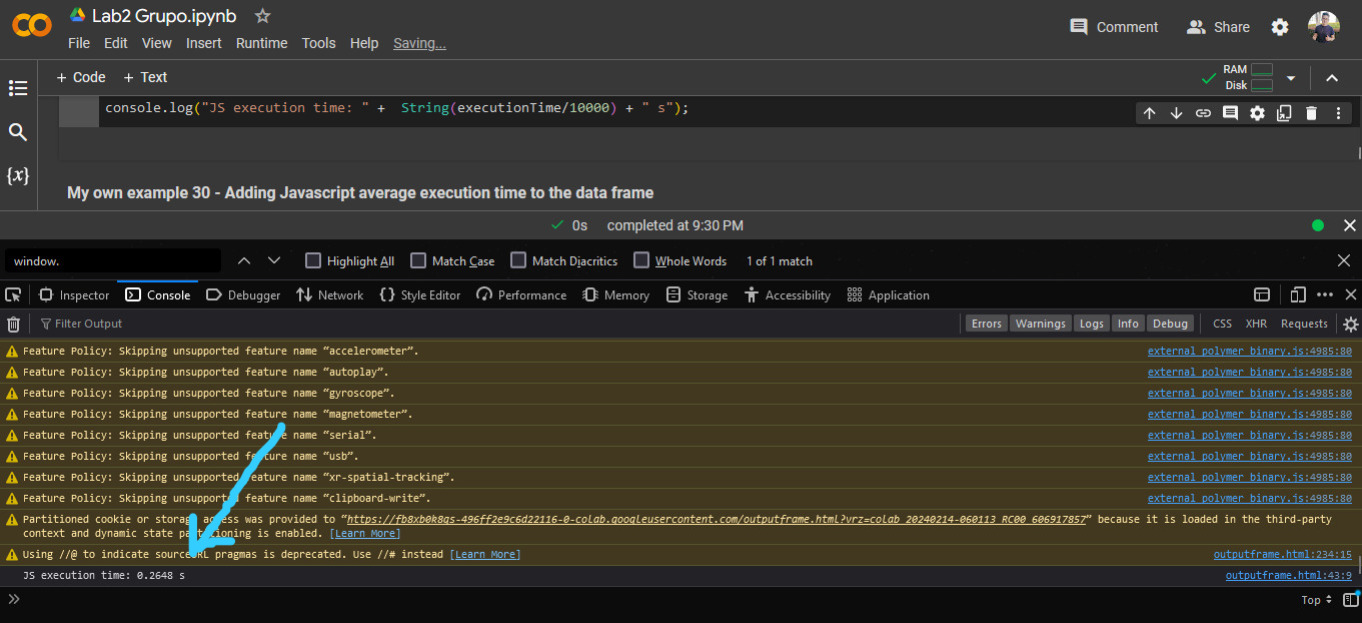

In [ ]:
# It was not possible to add the time directly, so the mean time is recorded manually
average_execution_times = average_execution_times.append({'name': 'Javascript', 'execution_time':0.2464}, ignore_index=True)
average_execution_times

<ipython-input-366-f34ac90e196f>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  average_execution_times = average_execution_times.append({'name': 'Javascript', 'execution_time':0.2464}, ignore_index=True)


,name,execution_time
0,python,9.067456
1,numpy,0.015558
2,fortran_magic,0.026550
3,fortran,0.020921
4,c,0.302146
5,c++,0.743580
6,Java,0.211731
7,Javascript,0.246400


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_execution = average_execution_times.loc[average_execution_times["execution_time"].idxmin()]
min_execution

name                 numpy
execution_time    0.015558
Speed Factor           NaN
Name: 1, dtype: object

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
min_execution_time = average_execution_times['execution_time'].min()
average_execution_times["Speed Factor"] = average_execution_times["execution_time"] / min_execution_time
average_execution_times

,name,execution_time,Speed Factor
0,python,9.067456,582.803610
1,numpy,0.015558,1.000000
2,fortran_magic,0.026550,1.706466
3,fortran,0.020921,1.344680
4,c,0.302146,19.420184
5,c++,0.743580,47.793013
6,Java,0.211731,13.608828
7,Javascript,0.246400,15.837167


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
average_execution_times = average_execution_times.sort_values(by='execution_time', ascending=True)
average_execution_times

,name,execution_time,Speed Factor
1,numpy,0.015558,1.000000
3,fortran,0.020921,1.344680
2,fortran_magic,0.026550,1.706466
6,Java,0.211731,13.608828
7,Javascript,0.246400,15.837167
4,c,0.302146,19.420184
5,c++,0.743580,47.793013
0,python,9.067456,582.803610


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 408 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 162 µs


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 313 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ],
       [ 2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ],
       [ 3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]], dtype=bool)

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0638195544963331

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([ 10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.])

In [ ]:
data.mean(axis=1)

array([  4.5,  14.5,  24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[ 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

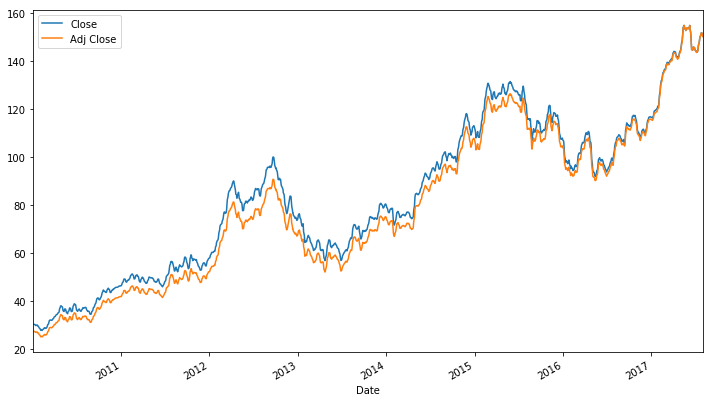

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

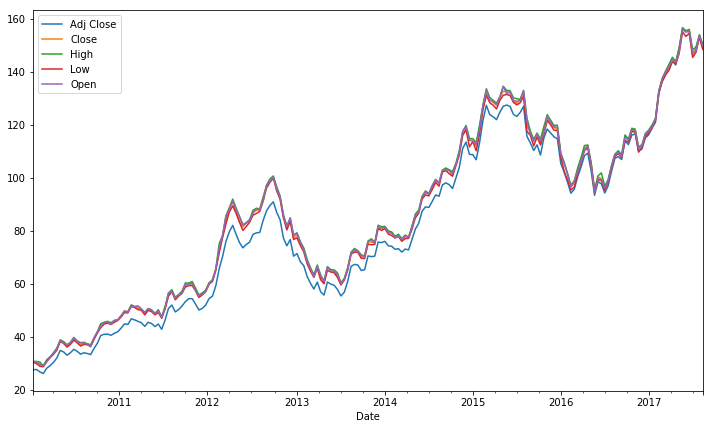

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

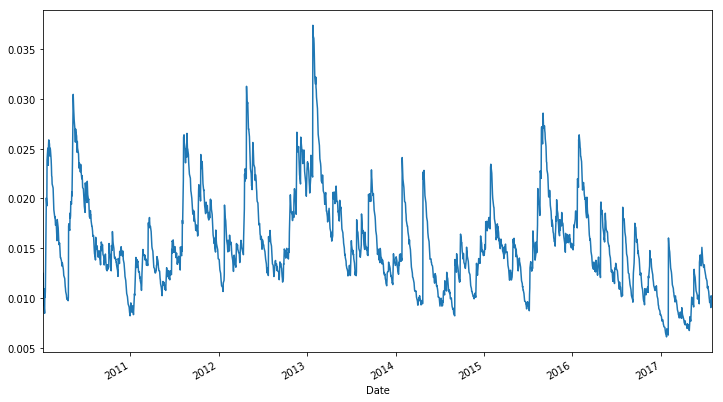

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

Let's make a data analysis using pandas. We are going to work with a dataframe from Boyacá Government, with describes the farming results in that region from 2011 to 2021

In [ ]:
import pandas as pd

cultivos= pd.read_csv('cultivos.csv')
cultivos.head()


,TIPO,MUNICIPIO,CULTIVO,PERIODO,Area Sembrada (ha),Area Cosechada (ha),Produccion (t),Rendimiento (t/ha)
0,CULTIVOS PERMANENTES,RAQUIRA,AGRAZ,2015,170.0,170.0,1360.0,8.0
1,CULTIVOS TRANSITORIOS SEMESTRE A,BUSBANZA,AHUYAMA,2018A,0.5,0.4,2.0,5.0
2,CULTIVOS PERMANENTES,BUENAVISTA,AGUACATE,2015,40.0,25.0,25.0,1.0
3,CULTIVOS PERMANENTES,COPER,AGUACATE,2015,4.0,2.0,24.0,12.0
4,CULTIVOS PERMANENTES,COPER,AGUACATE,2015,20.0,10.0,70.0,7.0


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
cultivos.dtypes

TIPO                    object
MUNICIPIO               object
CULTIVO                 object
PERIODO                 object
Area Sembrada (ha)     float64
Area Cosechada (ha)    float64
Produccion (t)         float64
Rendimiento (t/ha)     float64
dtype: object

Let's take a look at the production for each year of an specific prop

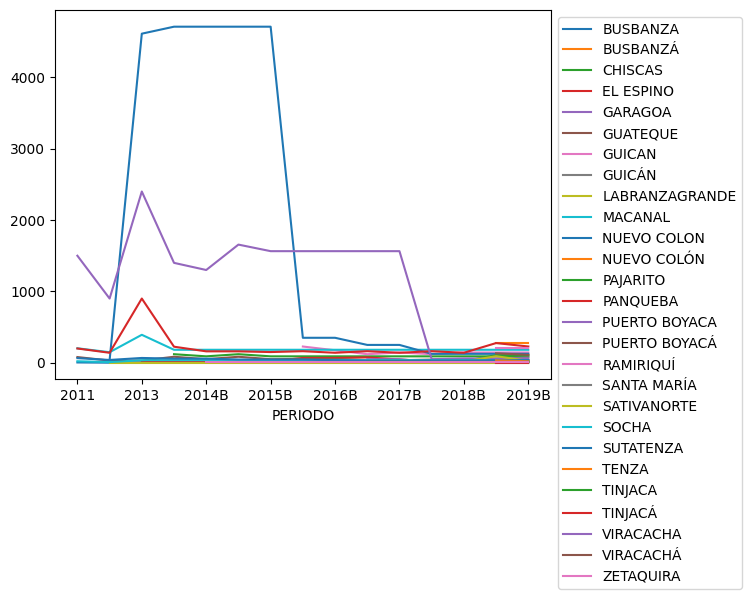

In [ ]:
#Produccion por año de ahuyama
av_AHU= cultivos[cultivos.CULTIVO == 'AHUYAMA']
av_AHU.groupby(['PERIODO', 'MUNICIPIO'])['Produccion (t)'].mean().unstack().ffill().plot();
plt.legend(bbox_to_anchor=(1, 1));


As you can see, the dataframe is not correctly checked, and theres redundant data. This can be fixed in the future using a language processor corrector and external libraries


Now let's examine the yearly global production in Boyacá

In [ ]:
def promedio_por_año1(cultivos):
    # Agrupar por año y municipio, calcular el promedio de producción
    promedio = cultivos.groupby(['PERIODO', 'MUNICIPIO'])['Produccion (t)'].mean().reset_index()
    return promedio

resultado = promedio_por_año1(cultivos)

# Imprime el resultado
print(resultado)

In [ ]:
def promedio_por_año(cultivos):
    # Agrupar por año y municipio, calcular el promedio de producción
    promedio = cultivos.groupby('PERIODO')['Produccion (t)'].mean().reset_index()
    return promedio

resultado = promedio_por_año(cultivos)

# Imprime el resultado
print(resultado)


   PERIODO  Produccion (t)
0     2011      639.292181
1    2011A      986.769825
2    2011B     1518.385305
3     2012     1522.872005
4    2012A      889.675331
5    2012B     1035.590450
6     2013      647.959487
7    2013A     1254.611028
8    2013B     1369.653348
9     2014      584.537988
10   2014A     1151.178000
11   2014B     1186.956646
12    2015      642.830384
13   2015A     1055.483669
14   2015B     1043.473475
15    2016      597.478525
16   2016A     1043.256757
17   2016B     1223.345905
18    2017      672.527965
19   2017A      978.883282
20   2017B     1033.080199
21    2018      602.214452
22   2018A      991.013537
23   2018B     1118.405871
24    2019      491.313068
25   2019A     1019.783017
26   2019B     1101.536694
27    2020     2437.361736
28   2020A     1027.504007
29   2020B     1100.713834
30    2021     2140.432113
31   2021A      980.950801
32   2021B     1025.452933
33    2022     2466.088819
34   2022B      924.092727


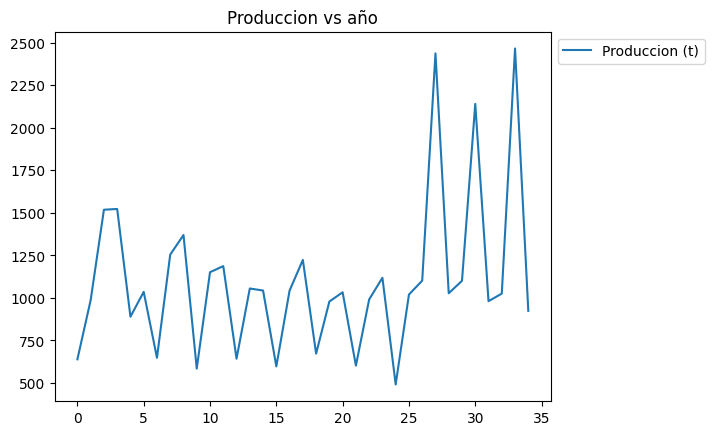

In [ ]:
promedio_por_año(cultivos).plot();
plt.gca().set_title("Produccion vs año");
plt.legend(bbox_to_anchor=(1, 1));

In the previous graph we can analyse the production behaviour, with periodical peaks an valleys which correspond to seasons

Finally, let's take a look to a correlation graph from the avocado data.

In [ ]:
# Calcula la correlación solo para el cultivo de aguacate
spread_correlation = cultivos[cultivos['CULTIVO'] == 'AGUACATE'].corr()
# Ordena el DataFrame por la columna 'CULTIVO'
cultivos_ordenados = cultivos[cultivos['CULTIVO'] == 'AGUACATE'].sort_values(by='Produccion (t)')
# Muestra la correlación y el DataFrame ordenado
#print("Correlación para el cultivo de aguacate:", spread_correlation)
print(cultivos_ordenados)

                       TIPO    MUNICIPIO   CULTIVO PERIODO  \
16500  CULTIVOS PERMANENTES        CHITA  AGUACATE    2019   
16066  CULTIVOS PERMANENTES  SANTA MARÍA  AGUACATE    2019   
16455  CULTIVOS PERMANENTES      GARAGOA  AGUACATE    2019   
16541  CULTIVOS PERMANENTES       ÚMBITA  AGUACATE    2019   
7785   CULTIVOS PERMANENTES    PACHAVITA  AGUACATE    2013   
...                     ...          ...       ...     ...   
4853   CULTIVOS PERMANENTES    SAN MATEO  AGUACATE    2017   
5908   CULTIVOS PERMANENTES      BRICEÑO  AGUACATE    2012   
7431   CULTIVOS PERMANENTES      QUIPAMA  AGUACATE    2014   
14154  CULTIVOS PERMANENTES       RONDON  AGUACATE    2016   
14386  CULTIVOS PERMANENTES    SAN MATEO  AGUACATE    2016   

       Area Sembrada (ha)  Area Cosechada (ha)  Produccion (t)  \
16500                 2.0                  0.0             0.0   
16066                 4.0                  0.0             0.0   
16455                 9.0                  0.0           

<ipython-input-53-516d64e7fe5d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spread_correlation = cultivos[cultivos['CULTIVO'] == 'AGUACATE'].corr()


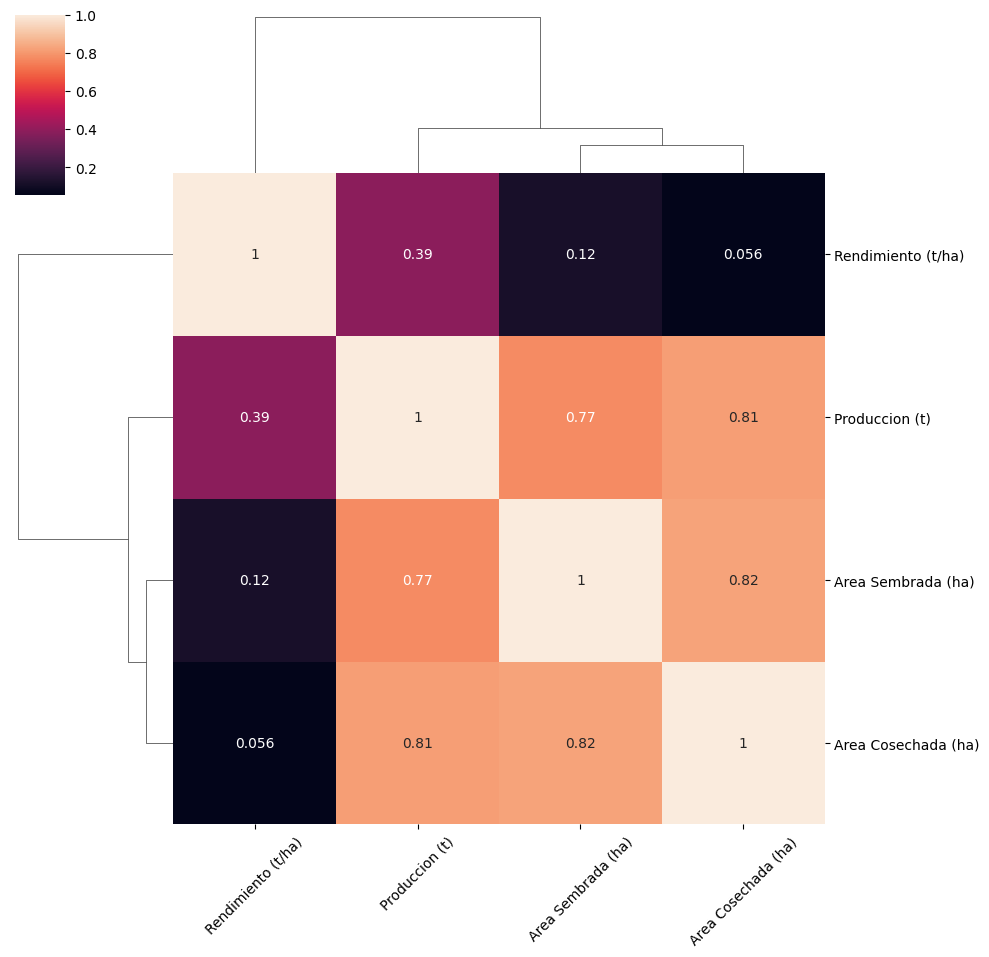

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);



We obtained the expected result. As an example, variables like production heavily depend on harvested areas.